In [56]:
!pip install folium
!pip install geocoder
!pip install geopy

In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import folium
import geocoder

from plotly.offline import  iplot
from branca.element import Figure



In [5]:
df=pd.read_csv('../data/netflix_titles.csv', encoding="latin-1")     ### cambio el 'encoding' ya que el dataset contiene caracteres no incluidos en 'utf-8'


##### Comprobamos los valores nulos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Limpiamos los datos nulos

##### Director, cast, country los dejamos ya que si no la mayoria de series se van. Estan vacios ya que al algunos contener varias temporadas, estos mismos pueden ser distintos en cada una

In [60]:
df['director'].fillna('Sin Datos', inplace=True)
df['cast'].fillna("Sin Datos", inplace=True)
df['country'].fillna("Sin Datos", inplace=True)
df.dropna(inplace=True)

#### Formateamos la fecha

In [61]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [62]:
pepe = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

pepe['total']=pepe.iloc[0::].sum(axis=1)
pepe.sort_values(by='total').tail(5)

year_added,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,total
listed_in,,,,,,,,,,,,,,,
"Dramas, Independent Movies, International Movies",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,38.0,56.0,76.0,38.0,30.0,252.0
"Comedies, Dramas, International Movies",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,36.0,65.0,55.0,72.0,43.0,274.0
Stand-Up Comedy,0.0,0.0,0.0,0.0,0.0,4.0,4.0,12.0,36.0,62.0,86.0,65.0,48.0,17.0,334.0
Documentaries,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,35.0,88.0,73.0,80.0,34.0,39.0,359.0
"Dramas, International Movies",0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,15.0,46.0,99.0,62.0,76.0,60.0,362.0


In [63]:
data_sub = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

data_sub['total']=data_sub.iloc[0::].sum(axis=1)
top_cinco=data_sub.sort_values(by='total').tail(5)



In [64]:
data_sub = df.groupby('listed_in')['year_added'].value_counts().unstack().fillna(0)

data_sub['total']=data_sub.iloc[0::].sum(axis=1)
top_cinco=data_sub.sort_values(by='total').tail(5)
data_sub.drop(['total'],axis=1, inplace=True)


In [65]:
colores=['#8B11FE','#ABFE11','#FE4E11','#FE1159','#2711FE']
data=[]
for i, mtv in enumerate(top_cinco.index):
    trace = go.Scatter(
                    x = data_sub.T[mtv].index,
                    y = data_sub.T[mtv],
                    mode = "lines",
                    marker = dict(color = colores),
                    name=mtv
                    )
    data.append(trace)


layout = dict(title = 'Top 5 Categorias mas subidas a Netflix',
              xaxis= dict(title= 'Order ',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [66]:
anadidos= df.groupby('month_name_added')['show_id'].count()
anadidos=pd.DataFrame(anadidos).reset_index()
anadidos.rename(columns={'month_name_added':'Mes',
                        'show_id':'Subidas'},inplace=True)

anadidos= df.groupby('month_name_added')['show_id'].count()

### Variacion de la longitud de las pelis o series segun pasan los annos

In [67]:
movies=df[df.type=='Movie']
shows=df[df.type=='TV Show']

In [68]:
movies.duration=movies.duration.map(lambda x : int(x.split(" ")[0]))


C:\Users\adria\AppData\Local\Temp\ipykernel_4396\1322811187.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
duracion_m= movies[['duration','release_year']].sort_values(by='release_year')
duracion_m=duracion_m.groupby('release_year').mean()
duracion_m.reset_index(inplace=True)

In [70]:
fig = px.bar(x=duracion_m.release_year, y=duracion_m.duration,data_frame=duracion_m,
              height=400)

fig.show()

### calificacion por paises

g-General audiences


pg- parental guidance suggested


pg-13- mayores 13 annos


R- menores de 17 con tutor


NC17- adults-only


Tv-y- publico preinfantil -6 anos


Tv-v7 - mas 7 anos


Tv-V7-Fv - 7 annos


Tv-G - Publico general


Tv-PG parental guidance


Tv-14 mayores 14


Tv-MA mayores 17

nr- not rated

ur- el corte original puede diferir del visualizado en cines o teatros

In [71]:
mapeo=df.groupby('country')['rating'].value_counts()
mapeo=pd.DataFrame(mapeo)


In [72]:
maaa=mapeo.unstack()
maaa=maaa.assign(address=0)

address=[]

for i in maaa.index:
    if len(i.split(","))==1:
        addres= geocoder.osm(i)
        address.append([addres.lat,addres.lng])
    else:
        maaa.drop(i,inplace=True,axis=0)

maaa['address']=address
maaa

rating                                                         \
rating            G NC-17   NR   PG PG-13    R TV-14 TV-G TV-MA TV-PG TV-Y   
country                                                                      
Argentina       NaN   NaN  2.0  NaN   NaN  1.0   7.0  2.0  39.0   3.0  2.0   
Australia       NaN   NaN  1.0  4.0   1.0  4.0  11.0  4.0  36.0  13.0  8.0   
Austria         NaN   NaN  NaN  NaN   NaN  1.0   1.0  NaN   3.0   NaN  NaN   
Bangladesh      NaN   NaN  NaN  NaN   NaN  NaN   1.0  NaN   1.0   1.0  NaN   
Belarus         NaN   NaN  NaN  NaN   NaN  NaN   NaN  NaN   NaN   NaN  1.0   
...             ...   ...  ...  ...   ...  ...   ...  ...   ...   ...  ...   
Uruguay         NaN   NaN  NaN  NaN   NaN  NaN   NaN  NaN   1.0   2.0  NaN   
Venezuela       NaN   NaN  NaN  NaN   NaN  NaN   1.0  NaN   NaN   NaN  NaN   
Vietnam         NaN   NaN  NaN  NaN   NaN  NaN   3.0  1.0   3.0   NaN  NaN   
West Germany    NaN   NaN  NaN  NaN   NaN  NaN   NaN  NaN   1.0   NaN  NaN   
Zimbabwe        NaN   NaN  NaN  NaN   NaN  NaN   NaN  1.0   NaN   NaN  NaN   

                                                    address  
rating       TV-Y7 TV-Y7-FV  UR                              
country                                                      
Argentina      NaN      NaN NaN  [-34.9964963, -64.9672817]  
Australia      3.0      NaN NaN      [-24.7761086, 134.755]  
Austria        NaN      NaN NaN        [47.59397, 14.12456]  
Bangladesh     NaN      NaN NaN    [24.4769288, 90.2934413]  
Belarus        NaN      NaN NaN    [53.4250605, 27.6971358]  
...            ...      ...  ..                         ...  
Uruguay        NaN      NaN NaN  [-32.8755548, -56.0201525]  
Venezuela      NaN      NaN NaN    [8.0018709, -66.1109318]  
Vietnam        NaN      NaN NaN   [13.2904027, 108.4265113]  
West Germany   NaN      NaN NaN   [40.4203479, -79.1166983]  
Zimbabwe       NaN      NaN NaN   [-18.4554963, 29.7468414]  

[74 rows x 15 columns]

In [73]:
mapa = folium.Map(

width = 1500,
height = 1200,
control_scale = True)


fig = Figure(width=1500, height=1200)
fig.add_child(mapa)
fig
address_latlng = [40.418759,-3.688986]



In [ ]:
for i in maaa.index:
    j=0
    f='------'+i+' ------<br>'
    for k in maaa.loc[i]['rating'].dropna():   
        p=str((maaa.loc[i]['rating'].index[j],k))
        f+=p+'<br><br><br>'
        j+=1
    folium.Marker(maaa.loc[i].address[0],
                    #popup = (i,"\n",maaa.loc[i]['rating'].dropna()),
                    popup = f,
                    tooltip = "click").add_to(mapa)
fig

In [6]:
cal=pd.DataFrame(df.groupby('country')['rating'].value_counts().unstack().fillna(0)).T.max(axis=1)
mal=cal[cal.index.isin(['TV-MA','R','PG','TV-PG'])]
mal=pd.DataFrame(mal)
mal.rename(columns={0:'conteo'},inplace=True)



,conteo
rating,
PG,164.0
R,440.0
TV-MA,928.0
TV-PG,251.0


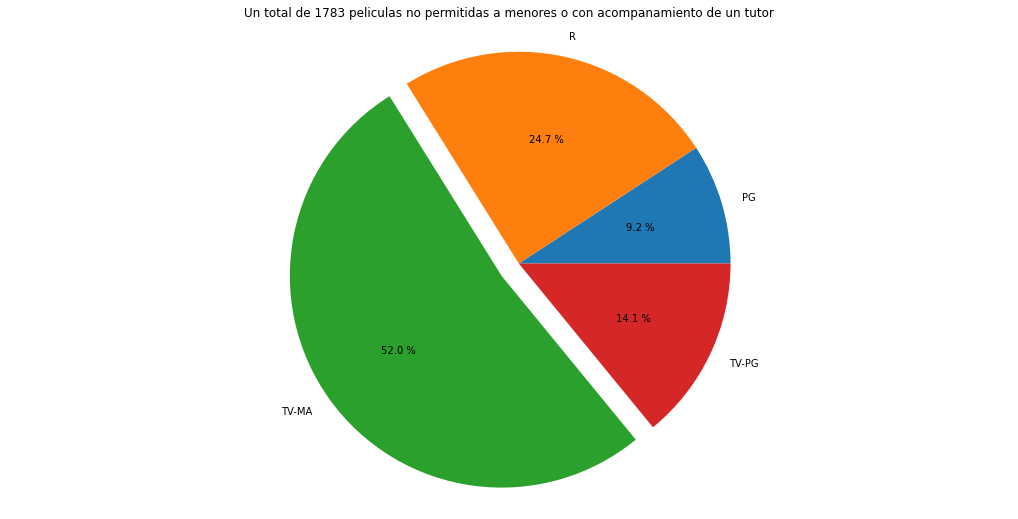

In [8]:
plt.subplots(figsize=(18,9))
desfase = (0., 0., 0.1, 0.)
plt.pie(mal.conteo, labels=mal.index,autopct="%0.1f %%",explode=desfase)
plt.title(label="Un total de %s peliculas no permitidas a menores o con acompanamiento de un tutor" % int(mal['conteo'].sum()),loc='center')
plt.axis('equal');
